# World Ranking University

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import re
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [2]:
df_world = pd.read_excel("Word Rank University.xlsx")
df_world

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,-,1322,-,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,-,-,-,1922,66.0


In [5]:
df_world.isnull().sum()

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [7]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


In [9]:
df_world.describe()

,National Rank,Score
count,2000.000000,2000.00000
mean,69.245000,71.75555
std,85.538608,5.03880
min,1.000000,66.00000
25%,9.750000,67.90000
50%,33.000000,70.40000
75%,89.000000,74.30000
max,332.000000,100.00000


In [11]:
df_world.describe(include="O")

,World Rank,University Names,Location,Educational Rank,Employability Rank,Faculty Rank,Research Rank
count,2000,2000,2000,2000,2000,2000,2000
unique,2000,2000,95,439,1030,262,1935
top,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,-,-,-,-
freq,1,1,332,1562,967,1727,66


In [13]:
df_world[["World Rank"]].sort_index()

,World Rank
0,1Top 0.1%
1,2Top 0.1%
2,3Top 0.1%
3,4Top 0.1%
4,5Top 0.1%
...,...
1995,1996Top 9.8%
1996,1997Top 9.8%
1997,1998Top 9.8%
1998,1999Top 9.8%


In [15]:
df_world[["World Rank"]].sort_values(by="World Rank")

,World Rank
999,1000Top 4.9%
1000,1001Top 4.9%
1001,1002Top 4.9%
1002,1003Top 4.9%
1003,1004Top 4.9%
...,...
996,997Top 4.9%
997,998Top 4.9%
998,999Top 4.9%
98,99Top 0.5%


### Convert from object to int

In [18]:
df_world['World Rank'].str.extract('(\d+)').astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_9916\211464508.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_world['World Rank'].str.extract('(\d+)').astype(int)


,0
0,1
1,2
2,3
3,4
4,5
...,...
1995,1996
1996,1997
1997,1998
1998,1999


In [20]:
arry_rank = df_world["World Rank"].to_numpy()

In [22]:
arry_rank

array(['1Top\xa00.1%', '2Top\xa00.1%', '3Top\xa00.1%', ...,
       '1998Top\xa09.8%', '1999Top\xa09.8%', '2000Top\xa09.8%'],
      dtype=object)

In [24]:
numeric_part = np.array([int(re.search(r'(\d+)', rank).group(1)) for rank in arry_rank])
numeric_part

array([   1,    2,    3, ..., 1998, 1999, 2000])

In [26]:
df_rank = pd.DataFrame({"World Rank": numeric_part})
df_rank

,World Rank
0,1
1,2
2,3
3,4
4,5
...,...
1995,1996
1996,1997
1997,1998
1998,1999


In [28]:
df_rank.sort_values(by="World Rank")

,World Rank
0,1
1,2
2,3
3,4
4,5
...,...
1995,1996
1996,1997
1997,1998
1998,1999


In [30]:
df_world["World Rank"] = df_rank["World Rank"]

In [32]:
df_world

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1996,1997,University of Arkansas at Little Rock,USA,332,-,1322,-,1920,66.0
1997,1998,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999,Bharathidasan University,India,64,-,-,-,1922,66.0


<Axes: xlabel='University Names'>

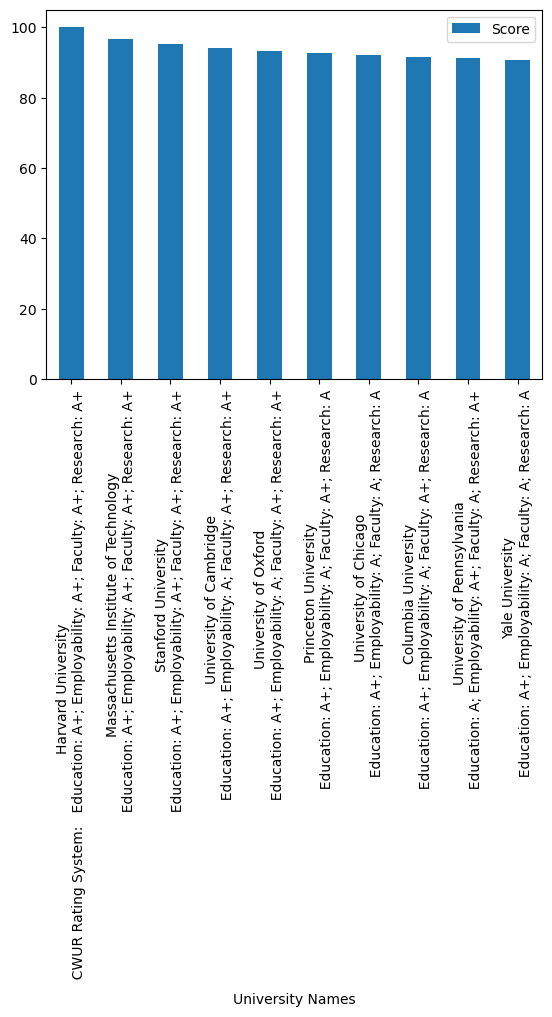

In [457]:
df_world[0:10].plot(x="University Names", y="Score", kind="bar") 

In [34]:
df_world.dtypes

World Rank              int32
University Names       object
Location               object
National Rank           int64
Educational Rank       object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object

### Uniqueness

In [37]:
df_world.describe().T

,count,mean,std,min,25%,50%,75%,max
World Rank,2000.0,1000.50000,577.494589,1.0,500.75,1000.5,1500.25,2000.0
National Rank,2000.0,69.24500,85.538608,1.0,9.75,33.0,89.00,332.0
Score,2000.0,71.75555,5.038800,66.0,67.90,70.4,74.30,100.0


In [39]:
df_world.describe(include="O")

,University Names,Location,Educational Rank,Employability Rank,Faculty Rank,Research Rank
count,2000,2000,2000,2000,2000,2000
unique,2000,95,439,1030,262,1935
top,Harvard University\n CWUR Rating System: Ed...,USA,-,-,-,-
freq,1,332,1562,967,1727,66


In [41]:
df_world[df_world[["Educational Rank","Employability Rank","Faculty Rank"]].duplicated()]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
189,190,Autonomous University of Barcelona,Spain,2,-,-,-,131,79.0
232,233,"Soochow University, China",China,27,-,-,-,177,78.1
256,257,Paul Sabatier University,France,13,-,-,-,198,77.6
268,269,Oregon Health & Science University,USA,88,-,-,-,218,77.4
288,289,Medical University of Vienna,Austria,2,-,-,-,234,77.0
...,...,...,...,...,...,...,...,...,...
1994,1995,"University of Djillali Liabès, Sidi Bel-Abbès",Algeria,2,-,-,-,1916,66.0
1995,1996,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1997,1998,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999,Bharathidasan University,India,64,-,-,-,1922,66.0


In [43]:
df_world[df_world["Employability Rank"] == "-"]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
37,38,Karolinska Institute,Sweden,1,39,-,35,62,85.8
60,61,Rockefeller University,USA,33,13,-,8,460,83.9
72,73,University of Texas Southwestern Medical Center,USA,41,41,-,42,167,83.2
86,87,Weizmann Institute of Science,Israel,2,24,-,51,289,82.4
111,112,University of Texas MD Anderson Cancer Center,USA,51,-,-,88,98,81.4
...,...,...,...,...,...,...,...,...,...
1994,1995,"University of Djillali Liabès, Sidi Bel-Abbès",Algeria,2,-,-,-,1916,66.0
1995,1996,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1997,1998,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999,Bharathidasan University,India,64,-,-,-,1922,66.0


In [45]:
df_world["Educational Rank"].value_counts()

Educational Rank
-      1562
1         1
440       1
165       1
370       1
       ... 
489       1
464       1
518       1
404       1
82        1
Name: count, Length: 439, dtype: int64

### c. What positions do universities in Saudi Arabia hold within the global rankings?

In [416]:
df_ksa = df_world[df_world["Location "] == "Saudi Arabia"]

In [418]:
df_ksa

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
244,245,King Abdulaziz University,Saudi Arabia,1,-,1330,-,186,77.8
278,279,King Abdullah University of Science and Techno...,Saudi Arabia,2,-,-,171,297,77.2
351,352,King Saud University,Saudi Arabia,3,-,344,-,332,76.1
656,657,King Fahd University of Petroleum and Minerals,Saudi Arabia,4,-,107,-,792,72.8
1310,1311,King Saud bin Abdulaziz University for Health ...,Saudi Arabia,5,-,-,-,1255,68.8
1446,1447,King Khalid University,Saudi Arabia,6,-,-,-,1385,68.1
1508,1509,Taif University,Saudi Arabia,7,-,-,-,1445,67.9
1546,1547,Imam Abdulrahman Bin Faisal University,Saudi Arabia,8,-,-,-,1484,67.7
1585,1586,Taibah University,Saudi Arabia,9,-,-,-,1520,67.5
1710,1711,Prince Sattam Bin Abdulaziz University,Saudi Arabia,10,-,-,-,1636,67.0


In [420]:
pie_palette = ['#3E885B','#7694B6','#85BDA6', '#80AEBD', '#2F4B26', '#3A506B']
green_palette = ['#2F4B26', '#3E885B', '#85BDA6', '#BEDCFE', '#C0D7BB']
blue_palette = ['#3A506B', '#7694B6', '#80AEBD', '#5BC0BE', '#3E92CC']
custom_palette = ['#3A506B', '#7694B6', '#80AEBD', '#3E885B', '#85BDA6']
red_palette = ['#410B13', '#CD5D67', '#BA1F33', '#421820', '#91171F']

In [436]:
df_ksa[df_ksa["World Rank"]]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
244,245,King Abdulaziz University,Saudi Arabia,1,-,1330,-,186,77.8
278,279,King Abdullah University of Science and Techno...,Saudi Arabia,2,-,-,171,297,77.2
351,352,King Saud University,Saudi Arabia,3,-,344,-,332,76.1
656,657,King Fahd University of Petroleum and Minerals,Saudi Arabia,4,-,107,-,792,72.8
1310,1311,King Saud bin Abdulaziz University for Health ...,Saudi Arabia,5,-,-,-,1255,68.8
1446,1447,King Khalid University,Saudi Arabia,6,-,-,-,1385,68.1
1508,1509,Taif University,Saudi Arabia,7,-,-,-,1445,67.9
1546,1547,Imam Abdulrahman Bin Faisal University,Saudi Arabia,8,-,-,-,1484,67.7
1585,1586,Taibah University,Saudi Arabia,9,-,-,-,1520,67.5
1710,1711,Prince Sattam Bin Abdulaziz University,Saudi Arabia,10,-,-,-,1636,67.0


<Axes: xlabel='University Names'>

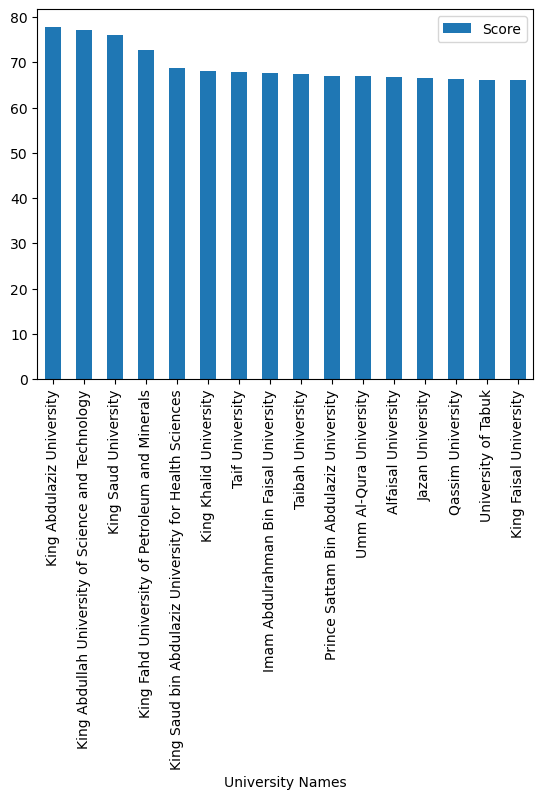

In [463]:

df_ksa.plot(x="University Names", y="Score", kind="bar") 

In [453]:
for ind in df_ksa.index:
    print(f'University Names:{df_ksa['University Names'][ind]}\n National Rank:{df_ksa['National Rank'][ind]}\tWorld Rank:{df_ksa['World Rank'][ind]}')
    print("")

University Names:King Abdulaziz University
 National Rank:1	World Rank:245

University Names:King Abdullah University of Science and Technology
 National Rank:2	World Rank:279

University Names:King Saud University
 National Rank:3	World Rank:352

University Names:King Fahd University of Petroleum and Minerals
 National Rank:4	World Rank:657

University Names:King Saud bin Abdulaziz University for Health Sciences
 National Rank:5	World Rank:1311

University Names:King Khalid University
 National Rank:6	World Rank:1447

University Names:Taif University
 National Rank:7	World Rank:1509

University Names:Imam Abdulrahman Bin Faisal University
 National Rank:8	World Rank:1547

University Names:Taibah University
 National Rank:9	World Rank:1586

University Names:Prince Sattam Bin Abdulaziz University
 National Rank:10	World Rank:1711

University Names:Umm Al-Qura University
 National Rank:11	World Rank:1742

University Names:Alfaisal University
 National Rank:12	World Rank:1762

University 

### e. Is there Correlation Between National Global University Rankings ? (Part 1)

In [72]:
df_world.head(2)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7


In [90]:
df_corr= df_world[["World Rank","National Rank"]]

In [94]:
df_corr.head(2)

,World Rank,National Rank
0,1,1
1,2,2


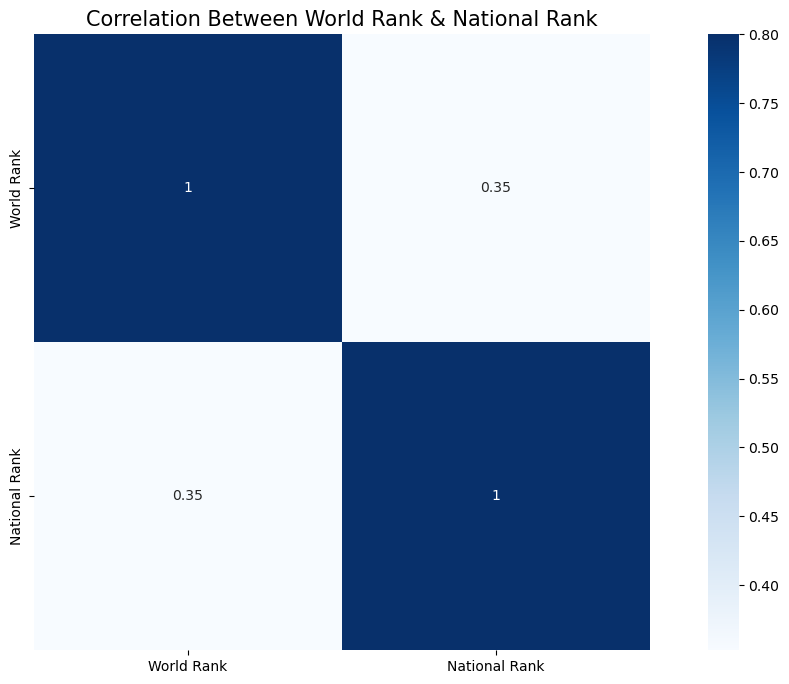

In [108]:
fig, ax = plt.subplots() 
fig.set_size_inches(15,8)
sns.heatmap(df_corr.corr(), vmax =.8, square = True, annot = True,cmap='Blues' )
plt.title('Correlation Between World Rank & National Rank',fontsize=15);

### e. Can you recommend a country that appears to have a high concentration of top-ranked universities? Part(2)

In [118]:
rank_country = df_world[["World Rank","University Names","Location "]]
rank_country.head(3)

,World Rank,University Names,Location
0,1,Harvard University\n CWUR Rating System: Ed...,USA
1,2,Massachusetts Institute of Technology\n Educa...,USA
2,3,Stanford University\n Education: A+; Employab...,USA


In [138]:
top_500_rank = rank_country.loc[:499,["University Names","Location ","World Rank"]]

In [140]:
top_500_rank.head(2)

,University Names,Location,World Rank
0,Harvard University\n CWUR Rating System: Ed...,USA,1
1,Massachusetts Institute of Technology\n Educa...,USA,2


In [160]:
top_500_rank["Location "].value_counts()

Location 
USA               135
China              65
United Kingdom     36
Germany            33
France             24
Australia          21
Italy              21
Canada             19
Japan              14
South Korea        13
Spain              12
Netherlands        12
Sweden             11
Switzerland         8
Belgium             7
Finland             6
Brazil              5
Israel              5
Denmark             5
Taiwan              4
Austria             4
Russia              4
South Africa        4
Portugal            3
Saudi Arabia        3
Norway              3
Greece              2
India               2
Chile               2
Poland              2
Singapore           2
Iran                2
New Zealand         2
Ireland             2
Mexico              1
Serbia              1
Argentina           1
Malaysia            1
Czech Republic      1
Slovenia            1
Thailand            1
Name: count, dtype: int64

In [336]:
top_10_countries = top_500_rank["Location "].value_counts().iloc[0:10]

In [338]:
top_10_countries

Location 
USA               135
China              65
United Kingdom     36
Germany            33
France             24
Australia          21
Italy              21
Canada             19
Japan              14
South Korea        13
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

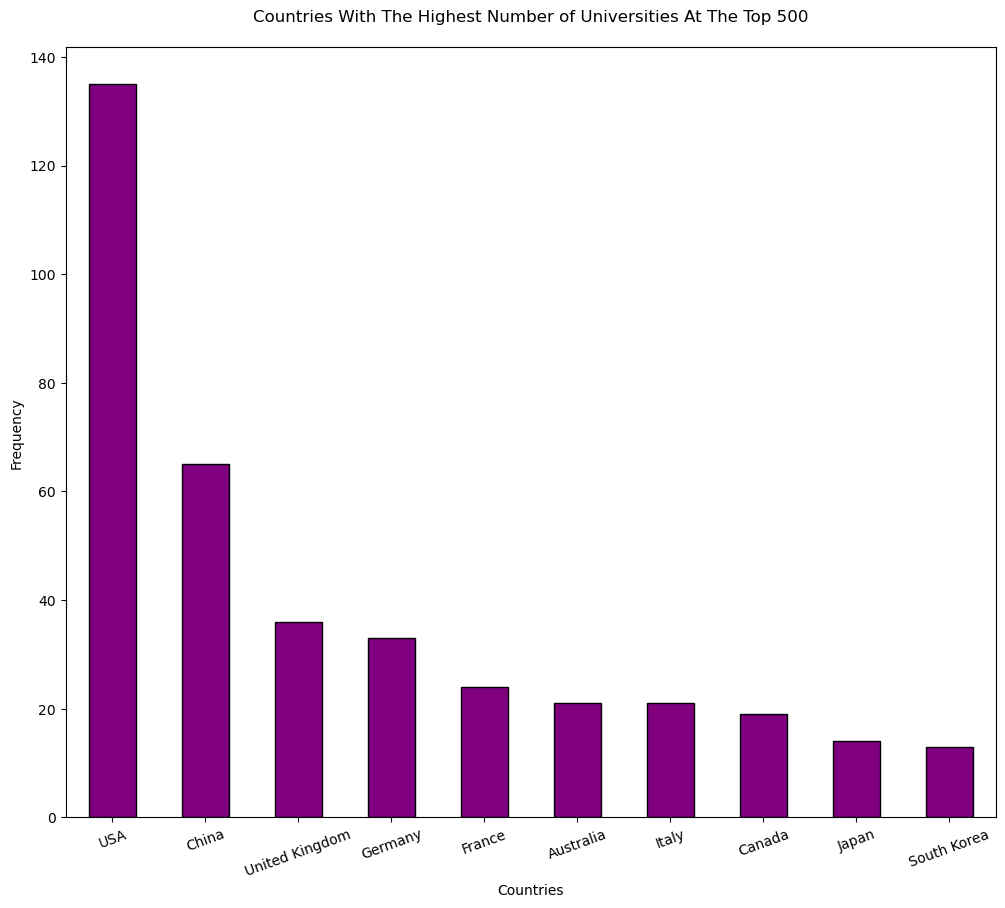

In [466]:
plt.figure(figsize=(12,10))
plt.title("Countries With The Highest Number of Universities At The Top 500\n")
top_10_countries.plot(kind='bar', edgecolor='black', rot=20, color= "Purple")



plt.xlabel('Countries')
plt.ylabel('Frequency')

## Shanghai Ranking

In [22]:
df_shang = pd.read_excel("shanghai Ranking.xlsx")
df_shang

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...
...,...,...,...,...,...,...
995,901-1000,University of Wuppertal,46-47,0.0,http://www.shanghairanking.com/_uni/logo/2ab2f...,http://www.shanghairanking.com/institution/uni...
996,901-1000,Warsaw University of Technology,7-11,0.0,http://www.shanghairanking.com/_uni/logo/a347c...,http://www.shanghairanking.com/institution/war...
997,901-1000,Western Norway University of Applied Sciences,6-7,0.0,http://www.shanghairanking.com/_uni/logo-jpg/d...,http://www.shanghairanking.com/institution/wes...
998,901-1000,Wroclaw University of Science and Technology,7-11,0.0,http://www.shanghairanking.com/_uni/logo/ed480...,http://www.shanghairanking.com/institution/wro...


In [37]:
df_time = pd.read_excel("Times Higher Education.xlsx")

In [39]:
df_time.head(3)

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_time.shape

(1591, 20)

In [43]:
df_time.describe()

,sdg-score-multi__number,sdg-score-multi__number 2,sdg-score-multi__number 3,sdg-score-multi__number 5,sdg-score-multi__number 6,sdg-score-multi__number 7,sdg-score-multi__number 8
count,867.000000,826.000000,812.000000,565.000000,498.000000,439.000000,483.000000
mean,8.193772,8.446731,7.902709,5.488496,6.777108,7.596811,5.962733
std,4.240660,4.786111,4.403411,3.151375,3.230968,4.278980,3.346928
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000
50%,9.000000,8.000000,8.000000,5.000000,6.000000,7.000000,4.000000
75%,11.000000,12.000000,11.000000,8.000000,8.000000,10.000000,7.000000
max,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [45]:
df_time.describe(include="O")

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__value,sdg-score-multi__value 2,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__value 5,sdg-score-multi__value 6,sdg-score-multi__value 7,sdg-score-multi__value 8
count,1591,1591,1500,1500,867,825,805,1583,1591,557,496,439,483
unique,64,1591,1500,110,250,236,228,87,64,147,143,113,108
top,1001+,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Turkey,73.0–87.2,45.2–58.6,48.4–57.7,1.5–45.2,7.9–53.8,44.7–54.5,48.4–57.7,48.4–57.7,2.8–35.7
freq,591,1,1,79,28,22,20,579,591,36,23,20,33


### Times Ranking University

In [51]:
df_times_rnk = pd.read_excel("Times Higher Education.xlsx")
df_times_rnk.head()

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,https://www.timeshighereducation.com/world-uni...,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,https://www.timeshighereducation.com/world-uni...,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_times_rnk.describe(include="O")

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__value,sdg-score-multi__value 2,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__value 5,sdg-score-multi__value 6,sdg-score-multi__value 7,sdg-score-multi__value 8
count,1591,1591,1500,1500,867,825,805,1583,1591,557,496,439,483
unique,64,1591,1500,110,250,236,228,87,64,147,143,113,108
top,1001+,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Turkey,73.0–87.2,45.2–58.6,48.4–57.7,1.5–45.2,7.9–53.8,44.7–54.5,48.4–57.7,48.4–57.7,2.8–35.7
freq,591,1,1,79,28,22,20,579,591,36,23,20,33


In [57]:
df_times_rnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1591 non-null   object 
 1   University Name                 1591 non-null   object 
 2   ranking-institution-title href  1500 non-null   object 
 3   Location                        1500 non-null   object 
 4   sdg-score-multi__number         867 non-null    float64
 5   sdg-score-multi__value          867 non-null    object 
 6   sdg-score-multi__number 2       826 non-null    float64
 7   sdg-score-multi__value 2        825 non-null    object 
 8   sdg-score-multi__number 3       812 non-null    float64
 9   sdg-score-multi__value 3        805 non-null    object 
 10  sdg-score-multi__value 4        1583 non-null   object 
 11  scores                          1591 non-null   object 
 12  sdg-score-multi__number 5       56

In [61]:
df_times_rnk.drop(['ranking-institution-title href'],axis=1,inplace=True)  #DELET ranking-institution-title href COLUMN 

In [67]:
df_times_rnk.head()

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_times_rnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rank                       1591 non-null   object 
 1   University Name            1591 non-null   object 
 2   Location                   1500 non-null   object 
 3   sdg-score-multi__number    867 non-null    float64
 4   sdg-score-multi__value     867 non-null    object 
 5   sdg-score-multi__number 2  826 non-null    float64
 6   sdg-score-multi__value 2   825 non-null    object 
 7   sdg-score-multi__number 3  812 non-null    float64
 8   sdg-score-multi__value 3   805 non-null    object 
 9   sdg-score-multi__value 4   1583 non-null   object 
 10  scores                     1591 non-null   object 
 11  sdg-score-multi__number 5  565 non-null    float64
 12  sdg-score-multi__value 5   557 non-null    object 
 13  sdg-score-multi__number 6  498 non-null    float